In [1]:
import glob
import numpy as np

# cognac data and tools
import cognac.insitu as insi

---
## load and select data

alees gps files may have to be edited manually 

In [2]:
# select campaign

#campaign = 'microco_leg2.yaml'
#campaign = 'lopstech19_leg1.yaml'
campaign = 'lopstech19_leg2.yaml'

cp = insi.utils.campaign(campaign)

In [3]:
# data directory and filename
#
#cp = insi.utils.campaign('microco_leg2.yaml')

data_dir = cp['enregistreur']['path']+'gps/'
#ll_lim = [6., 6.3, 42.8, 43.1]

gps_files = sorted(glob.glob(data_dir+'alees/*G7.DAT')) #[:2]
gps_all = insi.gps.read_gps_alees(gps_files, verbose=False)

Reads /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/enregistreur/gps/alees/102606G7.DAT
Reads /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/enregistreur/gps/alees/102716G7.DAT
Reads /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/enregistreur/gps/alees/102717G7.DAT
Reads /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/enregistreur/gps/alees/102718G7.DAT
Reads /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/enregistreur/gps/alees/102719G7.DAT
Reads /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/enregistreur/gps/alees/102720G7.DAT
Reads /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/enregistreur/gps/alees/102721G7.DAT
Reads /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/enregistreur/gps/alees/102722G7.DAT
Reads /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/enregistre

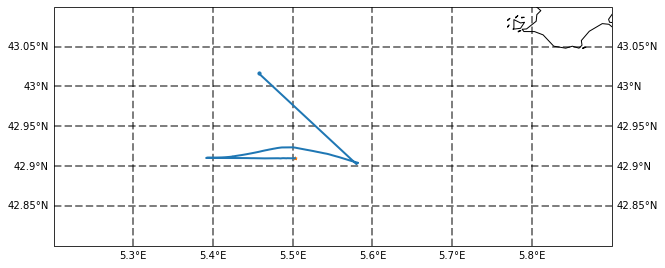

In [5]:
fac = insi.utils.plot_map(cp=cp)
gps_all.plot(fac)

In [8]:
from bokeh.io import output_notebook, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure

output_notebook()

TOOLS = 'pan,wheel_zoom,box_zoom,reset,help'

# subsample and compute speed
d = gps_all.d.resample('1T').mean()
d['speed'] = 111000. * np.sqrt( (np.cos(np.pi/180.*d['lat']) \
                               *d['lon']).diff()**2 \
                              + d['lat'].diff()**2 )/60.

# create a new plot and add a renderer
s1 = figure(tools=TOOLS, plot_width=300, plot_height=300, title=None, 
              x_axis_type='datetime')
s1.line('time', 'lon', source=d)
s = s1
for r in cp['enregistreur']:
    s.circle(x=[r.start.time], y=[r.start.lon], color='orange')
    s.circle(x=[r.end.time], y=[r.end.lon], color='red')
s.add_tools(HoverTool(
    tooltips=[('time','@time{%T}'),('lon','@{lon}{%0.4f}'),],
    formatters={'time': 'datetime','lon' : 'printf',},
    mode='vline'
    ))
    
s2 = figure(tools=TOOLS, plot_width=300, plot_height=300, title=None, 
               x_axis_type='datetime', x_range=s1.x_range)
s2.line('time', 'lat', source=d)
s = s2
for r in cp['enregistreur']:
    s.circle(x=[r.start.time], y=[r.start.lat], color='orange')
    s.circle(x=[r.end.time], y=[r.end.lat], color='red')
s.add_tools(HoverTool(
    tooltips=[('time','@time{%T}'),('lat','@{lat}{%0.4f}'),],
    formatters={'time': 'datetime','lat' : 'printf',},
    mode='vline'
    ))

s3 = figure(tools=TOOLS, plot_width=300, plot_height=300, title=None, 
               x_axis_type='datetime', x_range=s1.x_range)
s3.line('time', 'speed', source=d)
s = s3
for r in cp['enregistreur']:
    s.ray(x=r.start.time, y=0, length=0,angle=90, angle_units='deg', color='orange')
    s.ray(x=r.end.time, y=0, length=0,angle=90, angle_units='deg', color='red')
s.add_tools(HoverTool(
    tooltips=[('time','@time{%T}'),('speed','@{speed}{%0.2f}m/s'),],
    formatters={'time': 'datetime','speed' : 'printf',},
    mode='vline'
    ))


p = gridplot([[s1, s2, s3]])

show(p)

Loading BokehJS ...

---
## trim data

Look at acoustic data in order to choose time of deployment and recovery

In [6]:
#
# clean gps data with deployment log
gps={}
for r in cp['enregistreur']:
    gps[r.label] = gps_all.clean(r, inplace=False)

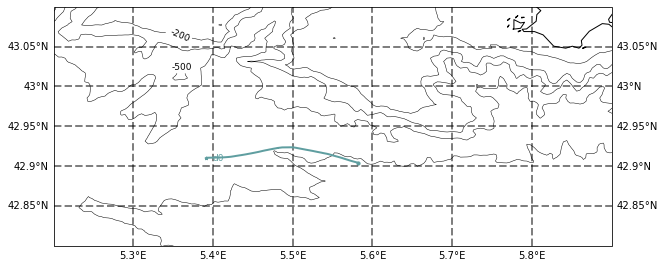

In [7]:
# plot overview map
fac = insi.utils.plot_map(cp=cp)
insi.utils.plot_bathy(fac)
for label, lgps in gps.items():
    lgps.plot(fac, label=label, color=cp['enregistreur']['color'])

--- 
## store

In [8]:
for label, lgps in gps.items():
    lgps.to_pickle(cp.pathp+'enregistreur_gps_'+label+'.p')

Data store to /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/datap/enregistreur_gps_d0.p
